This just loads the libraries for plotting and computing with arrays, etc.

In [15]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


Generate some time samples at random spacing (close to $\delta t = 0.1$, but with some jitte):

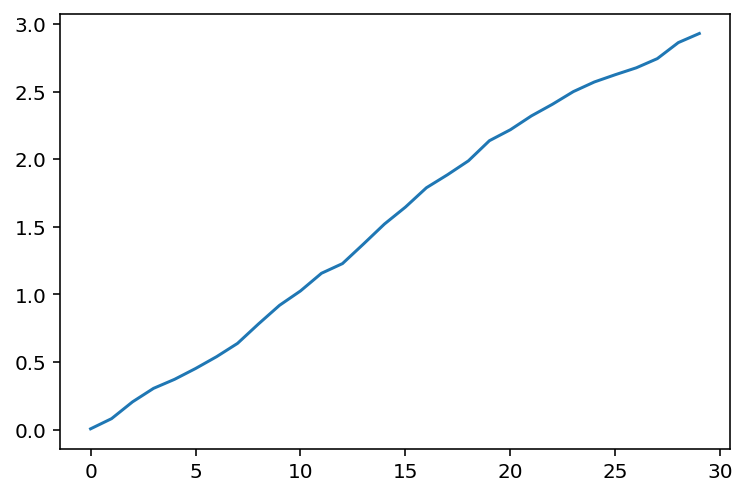

In [16]:
N = 30
ts = cumsum(0.1 + np.random.uniform(low=-0.05, high=0.05, size=N))-0.1
plot(ts)

Then we generate a signal with these fixed parameters:

In [24]:
A_true = 1.2
B_true = 0.5
mu_true = 0.23

sigma = 1.0 + random.uniform(low=-0.5, high=0.5, size=N)

ys_true = mu_true + A_true*cos(2*pi*ts) + B_true*sin(2*pi*ts)

From here, loop.  First, generate a data set by adding a draw of random noise to the signal:

<ErrorbarContainer object of 3 artists>

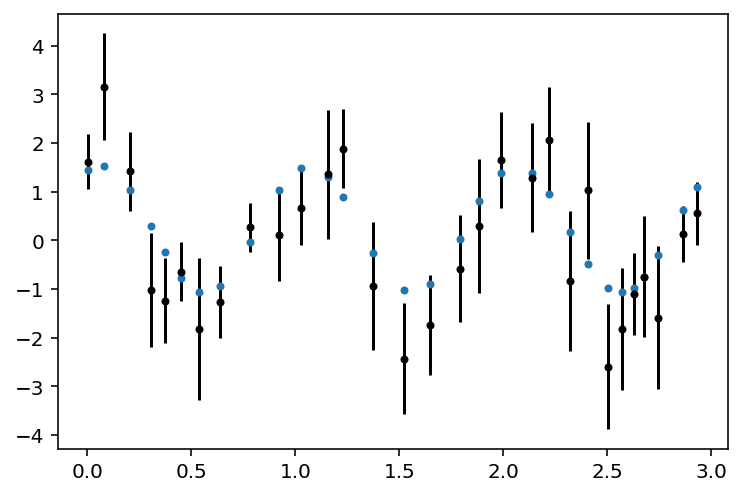

In [30]:
ys = ys_true + sigma*randn(len(ts))

plot(ts, ys_true, '.')
errorbar(ts, ys, yerr=sigma, fmt='.', color='k')

Re-phrase this as a fitting problem: 
$$
\vec{y} = \mathbf{A} \vec{x} + \vec{\epsilon}
$$
where
$$
\vec{x} = \begin{pmatrix}
\mu \\
A \\
B 
\end{pmatrix}
$$
is a vector of parameters, $\mathbf{A}$ is a "design matrix" whose columns are constant, cosine, and sine, and $\vec{\epsilon} \sim N(0,1)$ is the random noise we added.  We least-squares fit for $\vec{x}$.

In [41]:
def weighted_mean(ys, sigma):
    wts = 1.0/(sigma*sigma)
    
    return np.sum(wts*ys)/np.sum(wts)

In [31]:
f_test = 1

A_matrix = column_stack((ones_like(ys), cos(2*pi*f_test*ts), sin(2*pi*f_test*ts)))

ytilde = ys / sigma
A_tilde = A_matrix / reshape(sigma, (len(ys), 1))

In [32]:
((mu, A, B), _, _, _) = np.linalg.lstsq(A_tilde, ytilde)

/Users/wfarr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


Here we plot the data, and the least-squares fitted signal.  The code in the `title(...)` call computes $\chi^2$; you will need to break this out into a function that you call so you can save the $\chi^2$ value each time through the loop.

In [34]:
def chi_squared(ts, ys, mu_A_B):
    ys_fit = np.dot(A_matrix, mu_A_B)
    
    residual = ys - ys_fit
    return np.sum(np.square(residual / sigma))

Delta-chi2 going from no signal to mean + sinusoidal is 46.1
Delta-chi2 going from constant signal to mean + sinusoidal is 45.5
Delta-chi2 going from no signal to constant signal is 0.6


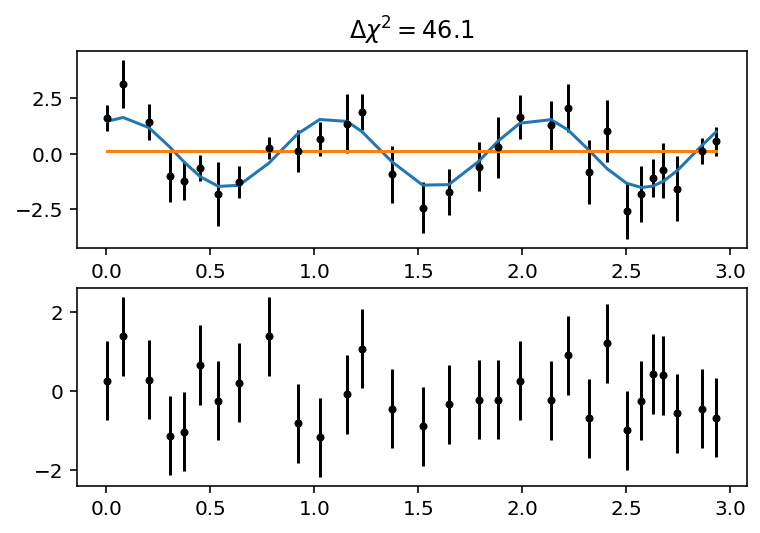

In [43]:
subplot(211)

mu_fit = weighted_mean(ys, sigma)

errorbar(ts, ys, yerr=sigma, fmt='.', color='k')
plot(ts, np.dot(A_matrix, (mu, A, B)))
plot(ts, mu_fit*ones_like(ys))

chi2_fit = chi_squared(ts, ys, (mu,A,B))
chi2_zero = chi_squared(ts, ys, (0,0,0))
chi2_fit_mean = chi_squared(ts, ys, (mu_fit, 0, 0))

title(r'$\Delta \chi^2 = {:.1f}$'.format(chi2_zero - chi2_fit))

subplot(212)
errorbar(ts, (ys-np.dot(A_matrix, (mu, A, B)))/sigma, yerr=ones_like(ys), fmt='.', color='k')

print('Delta-chi2 going from no signal to mean + sinusoidal is {:.1f}'.format(chi2_zero - chi2_fit))
print('Delta-chi2 going from constant signal to mean + sinusoidal is {:.1f}'.format(chi2_fit_mean - chi2_fit))
print('Delta-chi2 going from no signal to constant signal is {:.1f}'.format(chi2_zero - chi2_fit_mean))

In [ ]:
Nloop = 100
chi2s = zeros(Nloop)
for i in range(Nloop):
    # Do stuff
    chi2s[i] = ...
    
chi2s_list = []
for i in range(Nloop):
    # Do stuff
    chi2s_list.append(...)
chi2s_list = array(chi2s_list)